<a href="https://colab.research.google.com/github/rockey1006/Variational-Autoencoders/blob/master/facenet_vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/rockey1006/facenet.git
!pip uninstall tensorflow
!pip install tensorflow==1.13.2
!pip install scipy==1.2.1
!pip install facenet

Cloning into 'facenet'...
remote: Enumerating objects: 3159, done.
remote: Total 3159 (delta 0), reused 0 (delta 0), pack-reused 3159
Receiving objects: 100% (3159/3159), 2.94 MiB | 5.20 MiB/s, done.
Resolving deltas: 100% (2238/2238), done.
Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 92.6MB 92kB/s 
     |████████████████████████████████| 368kB 51.0MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 3.2MB 55.0MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Un

In [6]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/20170708-150701.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content/facenet/cnn')

In [7]:

from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/demo.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content/demo')

In [18]:
!python facenet/src/generative/calculate_attribute_vectors.py \
facenet.src.generative.models.dfc_vae \
/content/facenet/cnn/20170708-150701/model.ckpt-50000 \
/content/demo/demo \
--annotations_filename /list.txt \
--output_filename attribute.h5 \
--batch_size 128 \
--image_size 160 \
--latent_var_size 100
##Modify calculate_attribute_vectors.py :'--annotations_filename'+'--output_filename'
#import facenet.src.facenet as facenet
#img_attribs = list(map(int, line[1:]))
# index_list =  list(range(len(image_list)))
#151 :fields = [n.encode("ascii", "ignore") for n in fields]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [19]:
import h5py
f = h5py.File('/content/attribute.h5' , 'r')
f.keys()
print([key for key in f.keys()])

['attribute_vectors', 'attributes', 'fields', 'latent_vars']


In [20]:
print(f['latent_vars'][0])
print(f['latent_vars'][0].shape)
print(f['latent_vars'][:].shape)

[-1.11296234e+01  8.38273335e+00  6.43019199e+00 -4.04175699e-01
 -1.72235451e+01 -1.07854128e+01  5.54952288e+00  1.00800266e+01
  5.53794956e+00  3.15876752e-01  1.27385254e+01 -9.04903221e+00
 -6.22065449e+00  7.75125742e+00 -1.34792767e+01 -5.76097345e+00
 -8.10993767e+00 -9.32144187e-03 -2.17959714e+00  3.67429566e+00
 -4.66047096e+00 -1.16865788e+01  3.46237040e+00  9.26404476e+00
  5.91861629e+00  6.19564772e+00  8.06471157e+00  1.08706570e+01
 -1.02510786e+00  2.39017200e+01 -2.30570030e+01 -1.07964716e+01
 -9.33106095e-02  7.43750048e+00 -1.60258999e+01 -1.41768265e+00
  3.70251060e+00 -9.49044895e+00  6.46138668e+00 -1.26763744e+01
  1.30352879e+01 -4.22612190e+00  6.97351217e+00 -8.15356636e+00
 -5.56600952e+00 -2.97669721e+00 -2.23337674e+00 -5.30519056e+00
 -5.70973110e+00  2.72253513e-01 -1.18111086e+01  7.99314404e+00
 -5.79675150e+00  1.80372334e+01 -2.64424324e+00 -9.68584442e+00
  1.19839630e+01 -9.69035149e+00  7.90027761e+00  1.98137646e+01
  7.57024145e+00 -4.37921

In [76]:
!python facenet/src/generative/modify_attribute.py \
facenet.src.generative.models.dfc_vae \
/content/facenet/cnn/20170708-150701/model.ckpt-50000 \
/content/facenet/cnn/20170708-150701/attribute_vectors.h5 \
/content/attribute.h5  \
/content/facenet/add6.png  \

##Modify attributes.py  1.by adding import facenet.src.facenet as facenet
#   2.import imageio         imageio.imwrite(image_filename, recon[16])(single face)
# imageio.imwrite(image_filename, img)(several faces)
#Modify dfc_vae.py :import facenet.src.generative.models.vae_base
#downgrade tensorflow from 2.0 to 1.13.2 
#see cature.jpg in google drive

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

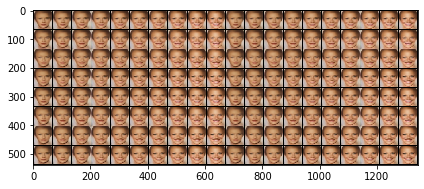

In [77]:

from skimage import data, io

img = io.imread("/content/facenet/add6.png")
io.imshow(img)

io.show()